To demonstrate the ``CCPPlot().feature()`` method, we load the ``DOM_GSEC`` example dataset (see [Breimann25a]_):

In [1]:
import matplotlib.pyplot as plt
import aaanalysis as aa
aa.options["verbose"] = False

df_seq = aa.load_dataset(name="DOM_GSEC_PU")
labels = df_seq["label"].to_list()
labels = [0 if x == 2 else x for x in labels] # Adjust labels

For any feature, we can display the distribution of feature values for a test and a reference dataset, provided by the ``df_seq`` and the corresponding ``labels`` parameters. The feature has to be a valid ``Part-Split-Scale`` combination (scales are given by their AAindex id): 

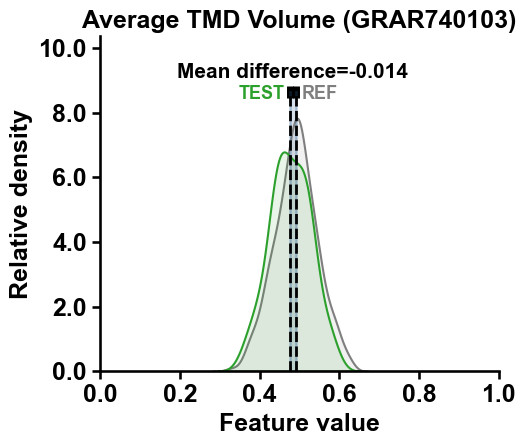

In [2]:
# This feature creates the average volume over the entire TMD sequence
feature = "TMD-Segment(1,1)-GRAR740103"
cpp_plot = aa.CPPPlot()
aa.plot_settings(font_scale=1)
cpp_plot.feature(feature=feature, df_seq=df_seq, labels=labels)
plt.title("Average TMD Volume (GRAR740103)")
plt.tight_layout()
plt.show()

We can now load the respective feature set for the ``DOM_GSEC_PU`` dataset:

In [3]:
sf = aa.SequenceFeature()
df_parts = sf.get_df_parts(df_seq=df_seq)
df_feat = aa.load_features(name="DOM_GSEC")
aa.display_df(df_feat, n_rows=15)

,feature,category,subcategory,scale_name,scale_description,abs_auc,abs_mean_dif,mean_dif,std_test,std_ref,p_val_mann_whitney,p_val_fdr_bh,positions,feat_importance,feat_importance_std
1,"TMD_C_JMD_C-Seg...3,4)-KLEP840101",Energy,Charge,Charge,"Net charge (Kle...n et al., 1984)",0.244000,0.103666,0.103666,0.106692,0.110506,0.000000,0.000000,"31,32,33,34,35",0.970400,1.438918
2,"TMD_C_JMD_C-Seg...3,4)-FINA910104",Conformation,α-helix (C-cap),α-helix termination,"Helix terminati...n et al., 1991)",0.243000,0.085064,0.085064,0.098774,0.096946,0.000000,0.000000,"31,32,33,34,35",0.000000,0.000000
3,"TMD_C_JMD_C-Seg...6,9)-LEVM760105",Shape,Side chain length,Side chain length,"Radius of gyrat... (Levitt, 1976)",0.233000,0.137044,0.137044,0.161683,0.176964,0.000000,0.000001,"32,33",1.554800,2.109848
4,"TMD_C_JMD_C-Seg...3,4)-HUTJ700102",Energy,Entropy,Entropy,"Absolute entrop...Hutchens, 1970)",0.229000,0.098224,0.098224,0.106865,0.124608,0.000000,0.000001,"31,32,33,34,35",3.111200,3.109955
5,"TMD_C_JMD_C-Seg...6,9)-RADA880106",ASA/Volume,Volume,Accessible surface area (ASA),"Accessible surf...olfenden, 1988)",0.223000,0.095071,0.095071,0.114758,0.132829,0.000000,0.000002,"32,33",0.000000,0.000000
6,"TMD_C_JMD_C-Seg...2,3)-KLEP840101",Energy,Charge,Charge,"Net charge (Kle...n et al., 1984)",0.222000,0.058671,0.058671,0.064895,0.069547,0.000000,0.000001,"27,28,29,30,31,32,33",0.000000,0.000000
7,"TMD_C_JMD_C-Seg...4,5)-FAUJ880109",Energy,Isoelectric point,Number hydrogen bond donors,"Number of hydro...e et al., 1988)",0.215000,0.146661,0.146661,0.174609,0.188034,0.000000,0.000004,"33,34,35,36",1.032400,1.510722
8,"TMD_C_JMD_C-Seg...3,4)-JANJ780101",ASA/Volume,Accessible surface area (ASA),ASA (folded protein),"Average accessi...n et al., 1978)",0.215000,0.124317,0.124317,0.166309,0.153364,0.000000,0.000004,"31,32,33,34,35",1.080400,1.296094
9,"TMD_C_JMD_C-Seg...,10)-WILM950103",Polarity,Hydrophobicity (interface),Hydrophobicity (interface),"Hydrophobicity ...e et al., 1995)",0.212000,0.141305,-0.141305,0.168603,0.217235,0.000000,0.000005,"33,34",1.747200,2.150664
10,"TMD_C_JMD_C-Seg...6,9)-AURR980110",Conformation,α-helix,α-helix (middle),"Normalized posi...ora-Rose, 1998)",0.211000,0.125350,0.125350,0.160819,0.174121,0.000000,0.000005,"32,33",1.788800,2.700803


We can plot the feature value distributions for the test and the reference datasets for the best feature using the ``CCPPlot().feature()`` method. You need to provide the CPP ``feature`` id (``Part-Split-Scale`` combination), the ``df_seq`` DataFrame, and its respective ``labels``:

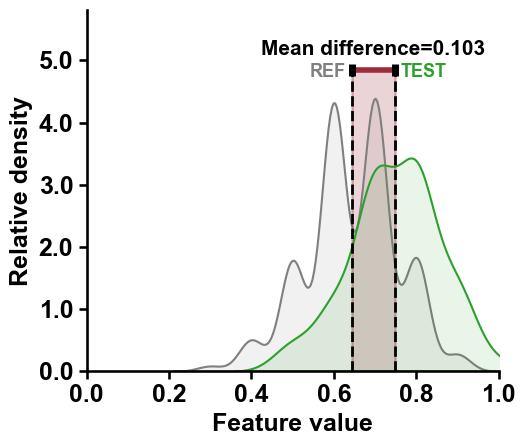

In [4]:
list_features = df_feat["feature"].to_list()
cpp_plot = aa.CPPPlot()
aa.plot_settings(font_scale=1)
cpp_plot.feature(feature=list_features[0], df_seq=df_seq, labels=labels)
plt.tight_layout()
plt.show()

**Test vs Reference Dataset**

The distributions for the test dataset (``TEST``, green) and the reference dataset (``REF``, gray) are compared by highlighted the difference of the mean values (called ``Mean difference``).

Set the feature name as title using the ``SequenceFeature().get_feature_names()`` method:

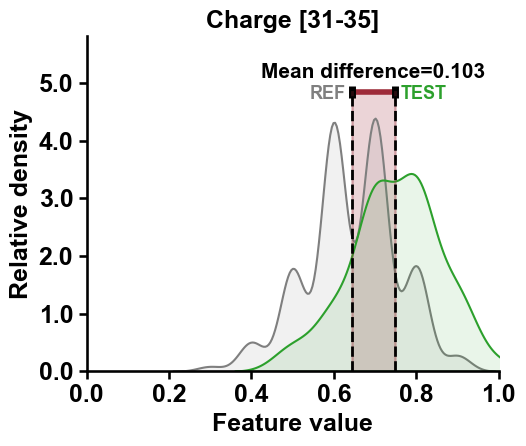

In [5]:
sf = aa.SequenceFeature()
feature_names = sf.get_feature_names(features=list_features)
cpp_plot.feature(feature=list_features[0], df_seq=df_seq, labels=labels)
plt.title(feature_names[0])
plt.tight_layout()
plt.show()

You can use the ``ax`` parameter to create subplots for displaying multiple features:

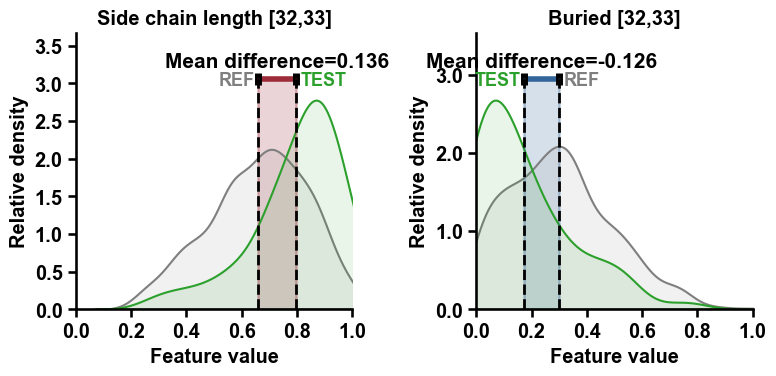

In [6]:
aa.plot_settings(font_scale=0.8)
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
cpp_plot.feature(ax=axes[0], feature=list_features[2], df_seq=df_seq, labels=labels)
cpp_plot.feature(ax=axes[1], feature=list_features[12], df_seq=df_seq, labels=labels)
axes[0].set_title(feature_names[2])
axes[1].set_title(feature_names[12])
plt.tight_layout()
plt.show()

**Positive vs Negative Mean Difference**

The mean difference of feature values can be either positive or negative:

**Positive** (indicated in red) means that the feature values of the test class are higher in average (e.g., left plot).

**Negative** (indicated in blue) means that the feature values of the test class are lower in average (e.g., left plot).

You can customize the plot by changing the ``figsize``, dataset names (via ``name_test`` and ``name_ref``), or dataset colors (via ``color_test`` and ``color_ref``):

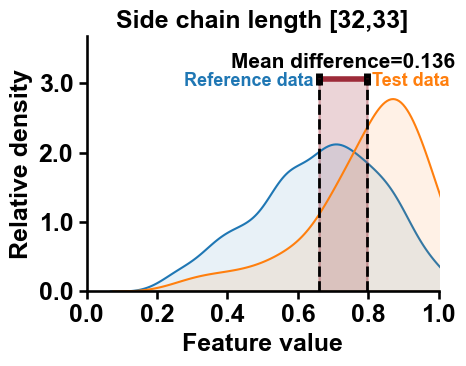

In [7]:
aa.plot_settings()
cpp_plot.feature(feature=list_features[2], df_seq=df_seq, labels=labels,
                 figsize=(5, 4), name_test="Test data", name_ref="Reference data",
                 color_test="tab:orange", color_ref="tab:blue")
plt.title(feature_names[2])
plt.tight_layout()
plt.show()

You change the density plot to a histogram by setting ``histplot=True``

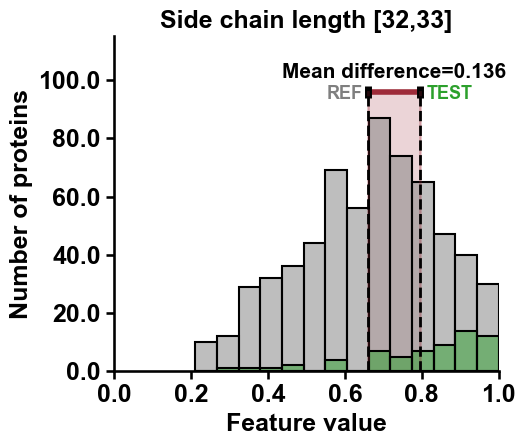

In [8]:
cpp_plot.feature(feature=list_features[2], df_seq=df_seq, labels=labels, histplot=True)
plt.title(feature_names[2])
plt.tight_layout()
plt.show()

Adjust the transparency (alpha value) of the histogram and the mean difference using the ``alpha_hist`` (default=0.1) and ``alpha_dif`` (default=0.2) parameters:

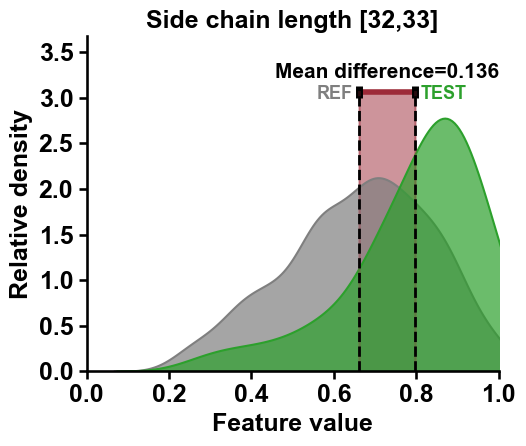

In [9]:
cpp_plot.feature(feature=list_features[2], df_seq=df_seq, labels=labels, alpha_dif=0.5, alpha_hist=0.7)
plt.title(feature_names[2])
plt.tight_layout()
plt.show()

To highlight samples within the distributions, the ``df_seq`` DataFrame needs to contain a ``name`` column. Selected names from this column are displayed if provided via the ``names_to_show`` parameter:  

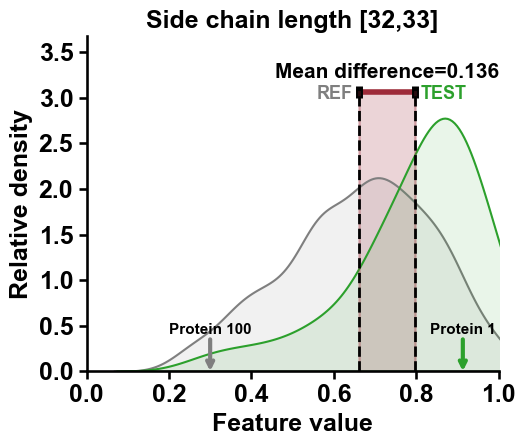

In [10]:
df_seq["name"] = [f"Protein {i}" for i in range(len(df_seq))]
cpp_plot.feature(feature=list_features[2], df_seq=df_seq, labels=labels, names_to_show=["Protein 1", "Protein 100"])
plt.title(feature_names[2])
plt.tight_layout()
plt.show()

You can show the sub-sequence for the ``Part-Split`` combination of the selected proteins by setting ``show_seq=True``:

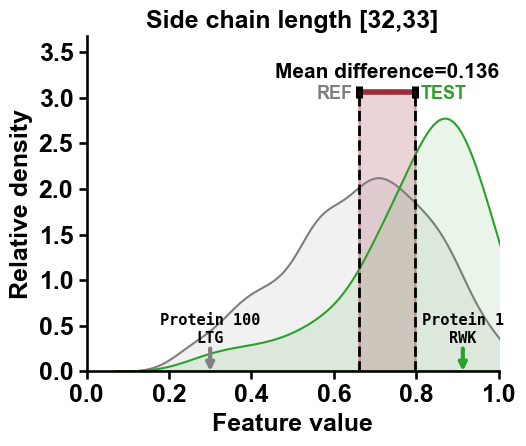

In [11]:
df_seq["name"] = [f"Protein {i}" for i in range(len(df_seq))]
cpp_plot.feature(feature=list_features[2], df_seq=df_seq, labels=labels, names_to_show=["Protein 1", "Protein 100"], show_seq=True)
plt.title(feature_names[2])
plt.tight_layout()
plt.show()

Following parameters are provided to adjust the font size: ``fontsize_mean_dif`` (default=15), ``fontsize_name_test`` (default=13), ``fontsize_name_ref`` (default=13), and ``fontsie_names_to_show`` (default=11):

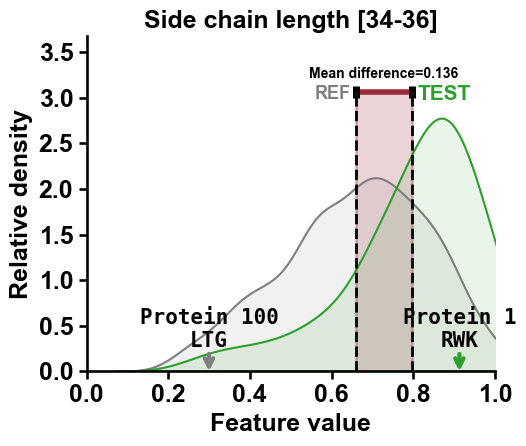

In [12]:
cpp_plot.feature(feature=list_features[2], df_seq=df_seq, labels=labels, names_to_show=["Protein 1", "Protein 100"], show_seq=True,
                 fontsize_mean_dif=10, fontsize_name_test=15, fontsize_name_ref=13, fontsize_names_to_show=15)
# Adjust the feature name for the TMD length
feature_names = sf.get_feature_names(list_features[2], tmd_len=23)
plt.title(feature_names[0])
plt.tight_layout()
plt.show()